In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/russia-vs-ukraine-tweets-datasetdaily-updated/filename.csv


In [2]:
# Import libraries
import pandas as pd
from textblob import TextBlob
from pandas.io.json import json_normalize
from wordcloud import WordCloud
import math
import re
import json
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)

In [3]:
data2=pd.read_csv('RUfile.csv')
data2.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [4]:
print('Count of columns in the dataset is:  ', len(data2.columns))
print('Count of rows in the dataset is:  ', len(data2))

Count of columns in the dataset is:   36
Count of rows in the dataset is:   10014


In [5]:
data2.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
data2[["tweet"]].head()

,tweet
0,@nazijaeger__ @derwener @Anonymous9775 Russia ...
1,The Russia HAARP which could destroy USA in on...
2,Putin gives Steven Seagal Russia&amp;#8217;s O...
3,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...
4,@Pottingpinks @mfa_russia @mod_russia @mil_his...


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  int64  
 1   conversation_id  10014 non-null  int64  
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  int64  
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

In [8]:
data2.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [9]:
np.sum(data2.isnull().any(axis=1))

10014

In [10]:
data2["language"].value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: language, dtype: int64

<AxesSubplot:ylabel='language'>

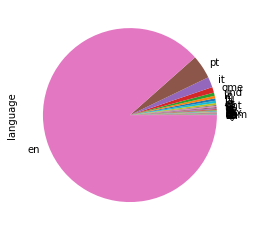

In [11]:
data2.language.value_counts().sort_values().plot(kind = 'pie')

In [12]:
data2["tweet"][0]

'@nazijaeger__ @derwener @Anonymous9775 Russia is a place where Satan rules well'

In [13]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [14]:
hashtags = hashtag_extract(data2["tweet"])
hashtags = sum(hashtags, [])

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font.



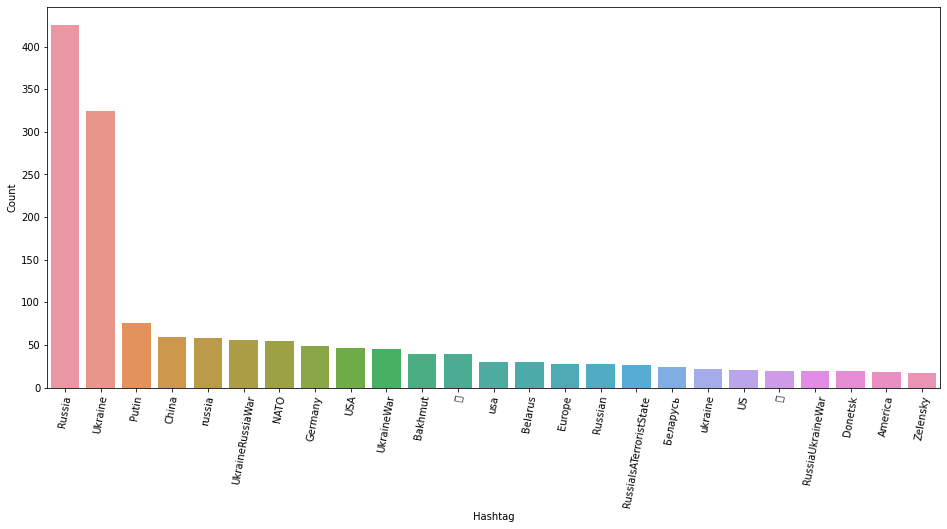

In [15]:
generate_hashtag_freqdist(hashtags)

In [16]:
# Preprocessing functions
"""
Removing ‘@names’,links (http | https),Punctuations, Numbers and Special characters. Because they don't convey any sentiment of the text

"""

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Basic function to clean the text
def clean_tweet(text):
    text = str(text)
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    # Remove identifications
    text = re.sub(r'@\w+', '', text)
    # Remove links
    text = re.sub(r'http.?://[^/s]+[/s]?', '', text)
    return text.strip().lower()

    
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [17]:
data2['Sentiment'] = data2['tweet'].apply(lambda x:analyze_sentiment(x))
data2['Source'] = 'random_user'
data2['Length'] = data2['tweet'].apply(len)
data2['Word_counts'] = data2['tweet'].apply(lambda x:len(str(x).split()))

In [18]:
data=data2[['tweet','retweets_count', 'Sentiment', 'Source', 'Length','Word_counts']]
data.head()

,tweet,retweets_count,Sentiment,Source,Length,Word_counts
0,@nazijaeger__ @derwener @Anonymous9775 Russia ...,0,0,random_user,79,11
1,The Russia HAARP which could destroy USA in on...,0,-1,random_user,117,18
2,Putin gives Steven Seagal Russia&amp;#8217;s O...,0,0,random_user,89,9
3,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,0,0,random_user,71,9
4,@Pottingpinks @mfa_russia @mod_russia @mil_his...,0,-1,random_user,283,43


In [19]:
pd.options.mode.chained_assignment = None  # default='warn'

In [20]:
data['Clean tweet'] = data['tweet'].apply(lambda x:clean_tweet(x))

In [21]:
data[["Clean tweet","Sentiment"]].iloc[100]

Clean tweet    kakakakaka gostei da proposta da russia  m98k2...
Sentiment                                                      0
Name: 100, dtype: object

In [22]:
neutral = data[data['Sentiment'] == 0]
positive = data[data['Sentiment'] == 1]
negative = data[data['Sentiment'] == -1]

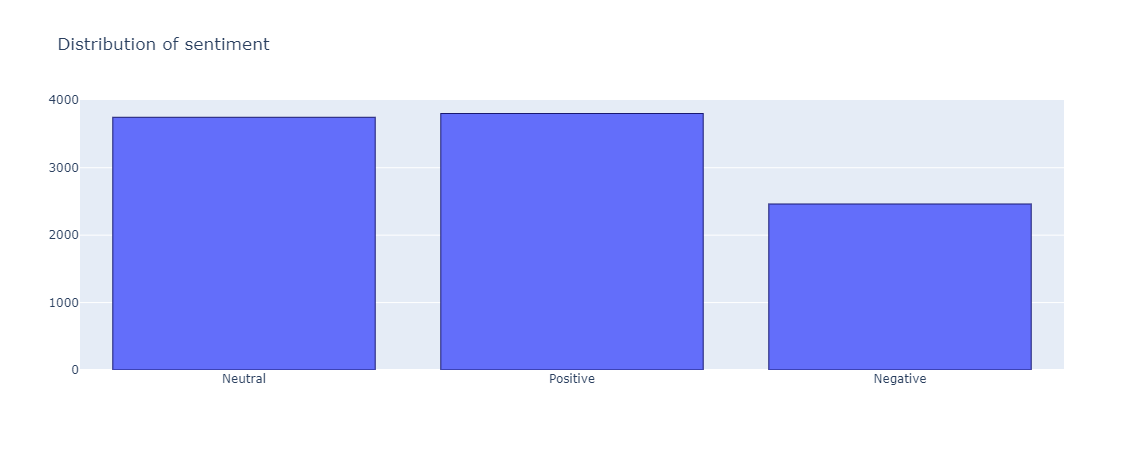

In [23]:
x = ['Neutral', 'Positive', 'Negative']
y = [len(neutral),  len(positive), len(negative)]

import plotly.graph_objs as go
# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['61% of tweets', '28% of tweets', '11% of tweets'])])

# Customize aspect
#marker_color='rgb(158,202,225)'
fig.update_traces(marker_line_color='midnightblue',
                  marker_line_width=1.)
fig.update_layout(title_text='Distribution of sentiment')
fig.show()



In [24]:
len(data)

10014

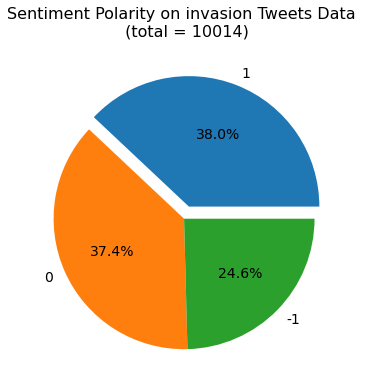

In [25]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data['Sentiment'].value_counts()]
labels = list(data['Sentiment'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on invasion Tweets Data \n (total = {})'.format(len(data)), fontsize = 16, pad = 20)
plt.show()

In [26]:
len(neutral)

3748

In [27]:
negative.iloc[1]

tweet             @Pottingpinks @mfa_russia @mod_russia @mil_his...
retweets_count                                                    0
Sentiment                                                        -1
Source                                                  random_user
Length                                                          283
Word_counts                                                      43
Clean tweet       how many millitary base did russia have outsid...
Name: 4, dtype: object

In [28]:


#neutral_text
print("Neutral tweet example  :",neutral['tweet'].values[15])
# Positive tweet
print("Positive Tweet example :",positive['tweet'].values[37])
#negative_text
print("Negative Tweet example :",negative['tweet'].values[1])



Neutral tweet example  : @joicehasselmann Bom...o ex presidente desprezível, genocida e imprestável, vulgo Bolsonaro, foi até a Rússia cumprimentar o Putin. Agora me fala vcs tem a empatia e comoção com os ucranianos, mas vcs tem na mesma medida dessa comoção por preto, pobre favelado que morre na mão de policial?
Positive Tweet example : @its_the_Dr Apparently he has to finish his war with Russia!   It will be the first time that nuclear weapons will be used to fight someone who hasn't attacked the United States.
Negative Tweet example : @Pottingpinks @mfa_russia @mod_russia @mil_hist_rf @muzeypobedy @rvio_ru @rushistorg @WW2Facts How many millitary base did russia have outside his border?. Check that of usa. Biolabs not left out. Can 🇺🇸 allow Russia to deploy weapons to mexico or cuba? Talkless of having a biolab ☣


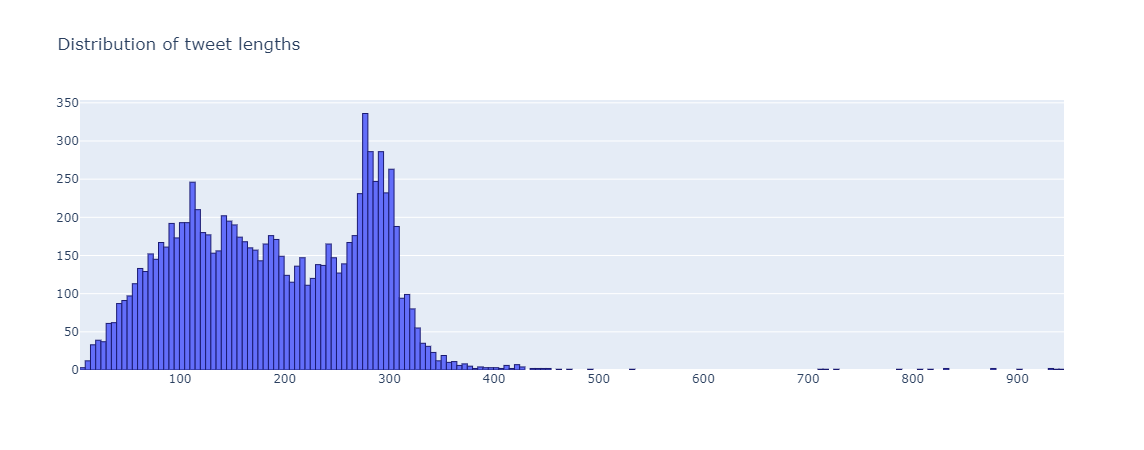

In [29]:


x = data.Length.values


fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5)])

fig.update_layout(title_text='Distribution of tweet lengths')
fig.show()



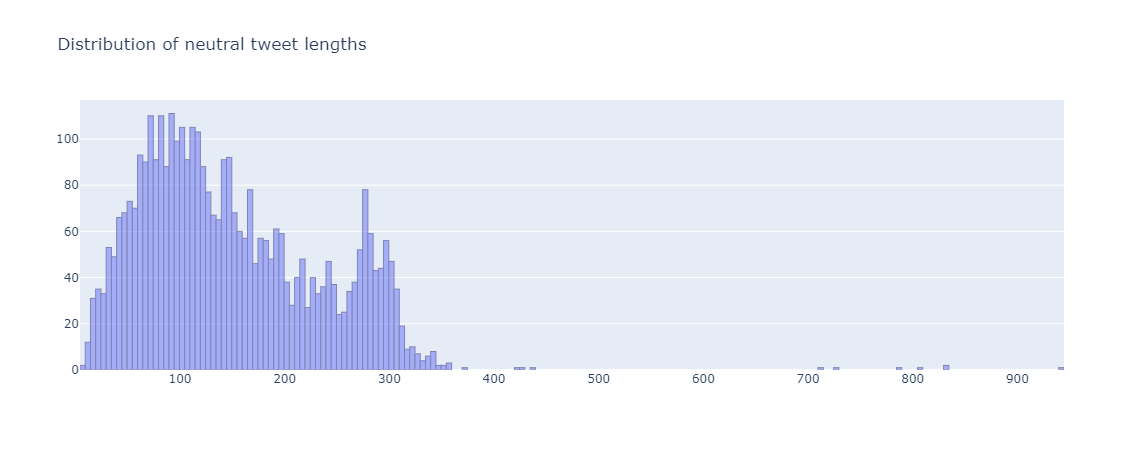

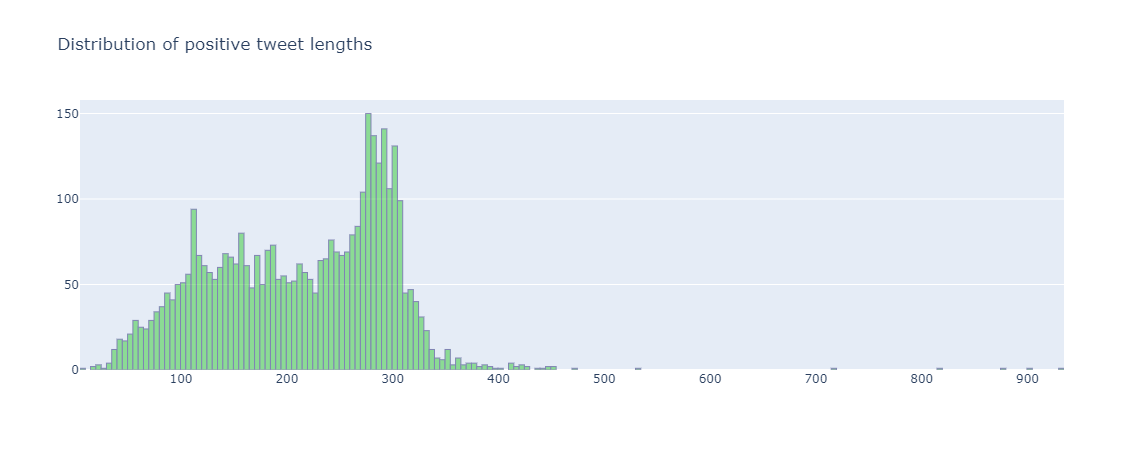

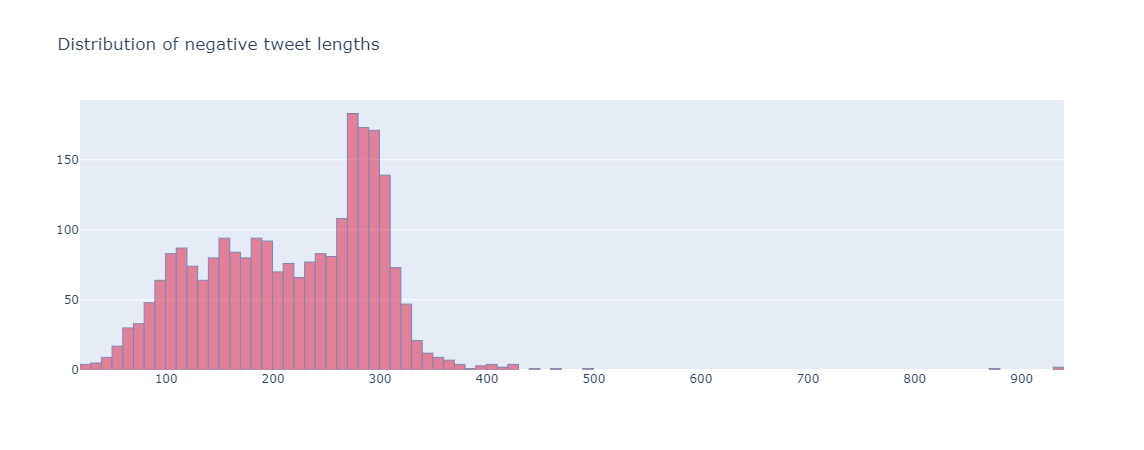

In [30]:
x1 = neutral.Length.values
x2 = positive.Length.values
x3 = negative.Length.values

fig = go.Figure(data=[go.Histogram(x=x1,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5,
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of neutral tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x2,
                                   marker_line_width=1, 
                                   marker_color='rgb(50,202,50)', 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5,
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of positive tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x3,
                                   marker_line_width=1, 
                                   marker_color='crimson', 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of negative tweet lengths')
fig.show()



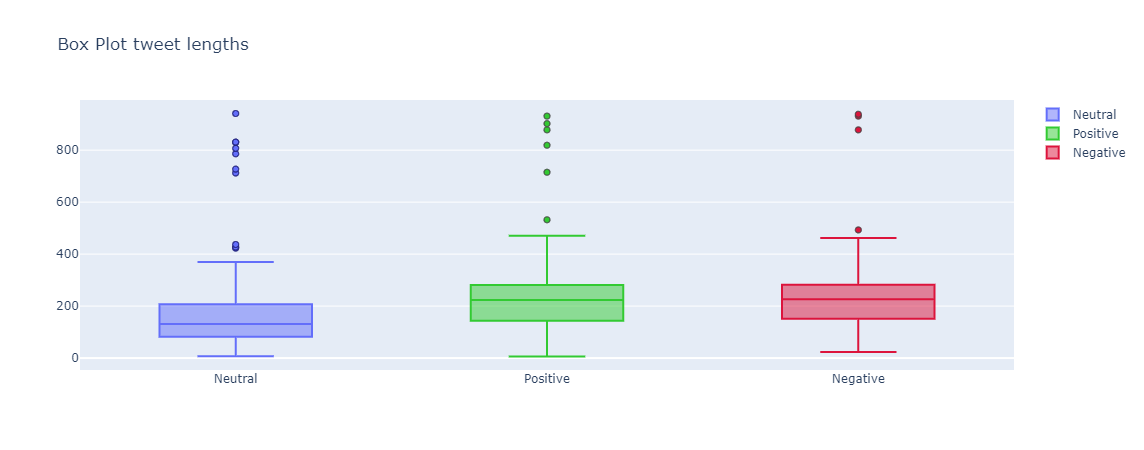

In [31]:
y1 = neutral.Length.values
y2 = positive.Length.values
y3 = negative.Length.values

fig = go.Figure()

fig.add_trace(go.Box(y=y1, 
                     name="Neutral", 
                     marker_line_width=1, 
                     marker_line_color="midnightblue"))

fig.add_trace(go.Box(y=y2, 
                     name="Positive", 
                     marker_line_width=1, 
                     marker_color = 'rgb(50,202,50)'))

fig.add_trace(go.Box(y=y3, 
                     name="Negative", 
                     marker_line_width=1, 
                     marker_color = 'crimson'))

fig.update_layout(title_text="Box Plot tweet lengths")

fig.show()



In [32]:
neutral

,tweet,retweets_count,Sentiment,Source,Length,Word_counts,Clean tweet
0,@nazijaeger__ @derwener @Anonymous9775 Russia ...,0,0,random_user,79,11,russia is a place where satan rules well
2,Putin gives Steven Seagal Russia&amp;#8217;s O...,0,0,random_user,89,9,putin gives steven seagal russia&amp;#8217;s o...
3,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,0,0,random_user,71,9,it’s always projection or russia with him!!!!!
10,@TaviDuprix @Tigerlily5319 @DC_Draino NATO DID...,0,0,random_user,226,37,nato did. russia was only protecting it's sove...
13,Sinceramente? Que a Russia e a Ucrania se expl...,0,0,random_user,114,20,sinceramente? que a russia e a ucrania se expl...
...,...,...,...,...,...,...,...
10008,@HuXijin_GT The Washington war criminals keep ...,0,0,random_user,289,53,the washington war criminals keep hitting chin...
10009,@wallacemick Its not Ukraine which investere w...,0,0,random_user,153,22,its not ukraine which investere war. russia an...
10011,@elonmusk If Russia lose the Rothschild are co...,0,0,random_user,145,25,if russia lose the rothschild are coming after...
10012,@RonFilipkowski Look forward to Russia liberat...,0,0,random_user,55,7,look forward to russia liberating kiev.


In [33]:
tokenized_tweet = data['Clean tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [russia, is, a, place, where, satan, rules, well]
1    [the, russia, haarp, which, could, destroy, us...
2    [putin, gives, steven, seagal, russia&amp;#821...
3    [it’s, always, projection, or, russia, with, h...
4    [how, many, millitary, base, did, russia, have...
Name: Clean tweet, dtype: object

In [34]:


from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()



0     [russia, is, a, place, where, satan, rule, well]
1    [the, russia, haarp, which, could, destroy, us...
2    [putin, give, steven, seagal, russia&amp;#8217...
3    [it’, alway, project, or, russia, with, him!!!!!]
4    [how, mani, millitari, base, did, russia, have...
Name: Clean tweet, dtype: object

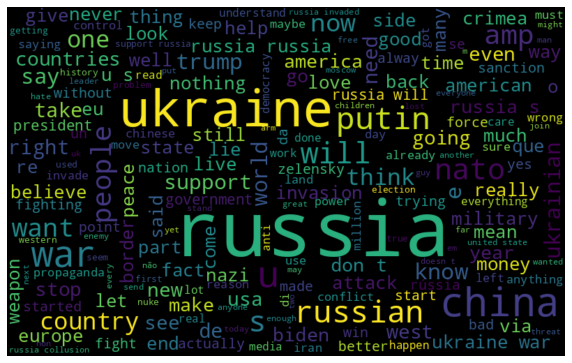

In [35]:
all_words = ' '.join([text for text in data['Clean tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



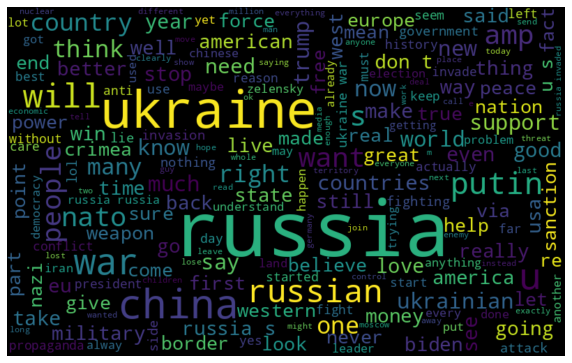

In [36]:
positive_words =' '.join([text for text in data['Clean tweet'][data['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



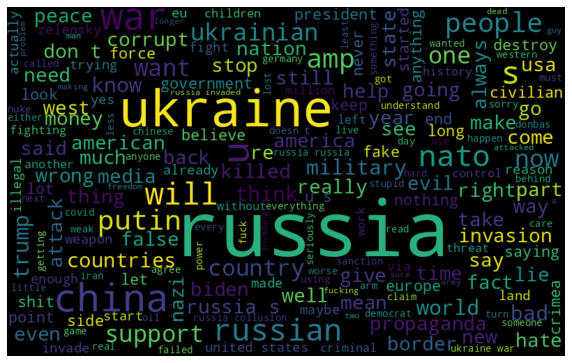

In [37]:
negative_words =' '.join([text for text in data['Clean tweet'][data['Sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

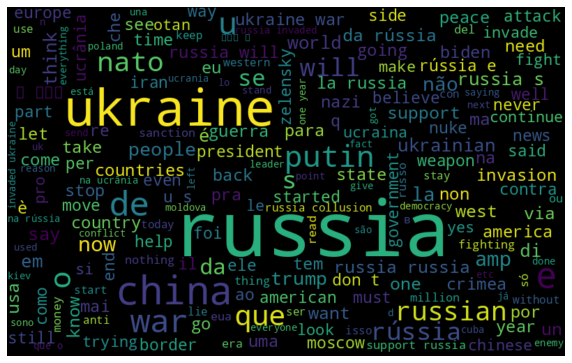

In [38]:
neutral_words =' '.join([text for text in data['Clean tweet'][data['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [40]:
HT = hashtag_extract(data['tweet'])
HT = sum(HT,[])

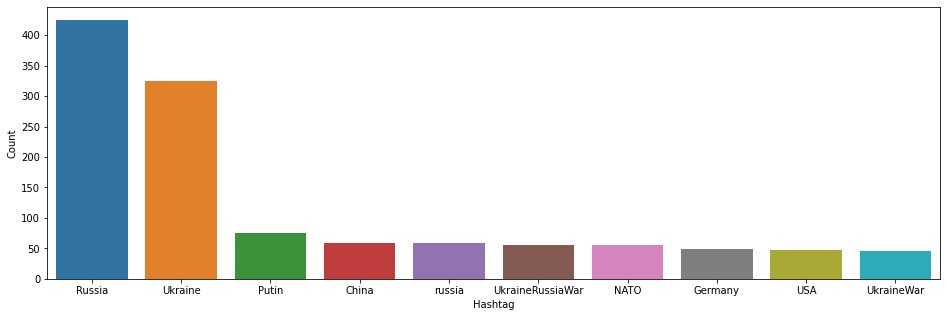

In [41]:
a = nltk.FreqDist(HT)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()